### Gathering Data

In [71]:
import pandas as pd
#Read twitter archive dataframe
twitter_archive_df_orig = pd.read_csv('twitter-archive-enhanced.csv')
pd.set_option('display.max_colwidth', -1)

In [72]:
# Make copy of dataframe
twitter_archive_df = twitter_archive_df_orig.copy()

In [73]:
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [74]:
#Download image predictions
import requests
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [75]:
#Write response variable to new file
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [76]:
#Read file into dataframe
image_predictions_df_orig = pd.read_csv('image_predictions.tsv', sep='\t')

In [77]:
#Make copy of dataframe
image_predictions_df = image_predictions_df_orig.copy()

In [78]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [79]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [80]:
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive_df.tweet_id.values
len(tweet_ids)

2356

In [81]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
# end = timer()
# print(end - start)
# print(fails_dict)


In [82]:
#Convert json file to dataframe
import json

tweet_ids = []
retweet_counts = []
favorite_counts = []

with open('tweet-json.txt') as json_file:
    #Read json file line by line
    for line in json_file:
        data = json.loads(line)
        tweet_ids.append(data['id'])
        retweet_counts.append(data['retweet_count'])
        favorite_counts.append(data['favorite_count'])
#Convert lists to dictionary
api_dict = {'tweet_id': tweet_ids, 'retweet_counts': retweet_counts, 'favorite_counts': favorite_counts}
#Convert dictionary to dataframe
api_df_orig = pd.DataFrame(api_dict)
#Make copy of dataframe
api_df = api_df_orig.copy()

In [83]:
api_df.head()

,tweet_id,retweet_counts,favorite_counts
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [84]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id           2354 non-null int64
retweet_counts     2354 non-null int64
favorite_counts    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### Data Assessment

In [85]:
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [86]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [87]:
twitter_archive_df.tweet_id.duplicated().sum()

0

In [88]:
twitter_archive_df.name.sort_values()

1035    Abby        
1021    Abby        
938     Ace         
1933    Acro        
1327    Adele       
1934    Aiden       
77      Aja         
480     Akumi       
820     Al          
875     Albert      
1954    Albert      
144     Albus       
412     Albus       
1115    Aldrick     
2046    Alejandro   
374     Alexander   
1189    Alexanderson
486     Alf         
2238    Alfie       
661     Alfie       
367     Alfie       
1616    Alfie       
858     Alfie       
51      Alfy        
201     Alice       
1701    Alice       
1495    Amber       
1334    Ambrose     
2078    Amy         
2195    Amélie      
         ...        
852     my          
988     not         
335     not         
1747    officially  
1206    old         
993     one         
1936    one         
924     one         
369     one         
2326    quite       
169     quite       
118     quite       
193     quite       
2030    space       
22      such        
2345    the         
2346    the  

In [89]:
twitter_archive_df.name.value_counts()

None          745
a             55 
Charlie       12 
Cooper        11 
Oliver        11 
Lucy          11 
Tucker        10 
Lola          10 
Penny         10 
Bo            9  
Winston       9  
the           8  
Sadie         8  
Buddy         7  
an            7  
Toby          7  
Bailey        7  
Daisy         7  
Leo           6  
Dave          6  
Bella         6  
Jax           6  
Oscar         6  
Koda          6  
Stanley       6  
Rusty         6  
Jack          6  
Scout         6  
Milo          6  
Gus           5  
             ..  
Bradley       1  
Christoper    1  
Iroh          1  
Berkeley      1  
Tango         1  
Gin           1  
Goose         1  
Iggy          1  
Orion         1  
Sora          1  
Ron           1  
Pete          1  
Philippe      1  
such          1  
Tayzie        1  
Major         1  
Grizzie       1  
Franq         1  
Dallas        1  
Rizzo         1  
Leonidas      1  
Teddy         1  
Nugget        1  
Lilli         1  
Mitch     

In [90]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [91]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [92]:
image_predictions_df.tweet_id.duplicated().sum()

0

In [93]:
api_df

,tweet_id,retweet_counts,favorite_counts
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [94]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id           2354 non-null int64
retweet_counts     2354 non-null int64
favorite_counts    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [95]:
api_df.tweet_id.duplicated().sum()

0

### Cleaning

#### Tidiness issues
- Dataframes need to be merged to have all tweet variables on one.
- Dog stage should be one column.

#### Quality issues
- Many names are not correct but are non-name words in lowercase.
- There are retweets and replies included in the Twitter archive.
- Timestamps in Twitter archive are object data types.
- Hundreds of dogs have the name "None", instead of NaN.
- Tweet IDs should be of the string/object datatype not integer in all dataframes.
- Null objects in URL series.
- Capitalize dog breed names.
- Remove some columns.


####  Define
- Replace words starting in lowercase with 'None' in the 'name' series using regex.

#### Code

In [96]:
# Replace non-name words with 'None'.

twitter_archive_df.name = twitter_archive_df.name.str.replace('^[a-z]+$', 'None')

#### Test

In [97]:
twitter_archive_df.name.value_counts()

None          854
Charlie       12 
Oliver        11 
Cooper        11 
Lucy          11 
Tucker        10 
Penny         10 
Lola          10 
Winston       9  
Bo            9  
Sadie         8  
Toby          7  
Buddy         7  
Bailey        7  
Daisy         7  
Jack          6  
Jax           6  
Oscar         6  
Koda          6  
Dave          6  
Milo          6  
Scout         6  
Leo           6  
Bella         6  
Rusty         6  
Stanley       6  
Bentley       5  
Sammy         5  
Louis         5  
Phil          5  
             ..  
Trevith       1  
Bradley       1  
Christoper    1  
Iroh          1  
Berkeley      1  
Tango         1  
Evy           1  
Ricky         1  
Gin           1  
Goose         1  
Ron           1  
Pete          1  
Philippe      1  
Tayzie        1  
Major         1  
Grizzie       1  
Franq         1  
Orion         1  
Dallas        1  
Leonidas      1  
Teddy         1  
Nugget        1  
Lilli         1  
Mitch         1  
Shooter   

#### Define
- Replace 'None' entries in 'name' series with null.

#### Code

In [98]:
import numpy as np
# Replace 'None' with NaN
twitter_archive_df.name = twitter_archive_df.name.replace('None', np.NaN)

#### Test

In [99]:
twitter_archive_df.name.value_counts()

Charlie       12
Oliver        11
Cooper        11
Lucy          11
Lola          10
Tucker        10
Penny         10
Bo            9 
Winston       9 
Sadie         8 
Buddy         7 
Daisy         7 
Bailey        7 
Toby          7 
Leo           6 
Scout         6 
Milo          6 
Dave          6 
Rusty         6 
Jax           6 
Stanley       6 
Jack          6 
Bella         6 
Oscar         6 
Koda          6 
Chester       5 
Finn          5 
Sunny         5 
Gus           5 
Oakley        5 
             .. 
Christoper    1 
Iroh          1 
Berkeley      1 
Tango         1 
Remy          1 
Lulu          1 
Florence      1 
Jo            1 
Evy           1 
Ricky         1 
Pete          1 
Philippe      1 
Tayzie        1 
Major         1 
Grizzie       1 
Franq         1 
Orion         1 
Dallas        1 
Leonidas      1 
Teddy         1 
Nugget        1 
Lilli         1 
Shooter       1 
Georgie       1 
Longfellow    1 
Rizzo         1 
Iggy          1 
Goose         

#### Define
- Convert 'timestamp' series data type to datetime.

#### Code

In [100]:
# Change timestamp from object to datetime datatype.
twitter_archive_df.timestamp = pd.to_datetime(twitter_archive_df.timestamp)

#### Test

In [101]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1502 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

In [102]:
twitter_archive_df.timestamp

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
5      2017-07-29 00:08:17
6      2017-07-28 16:27:12
7      2017-07-28 00:22:40
8      2017-07-27 16:25:51
9      2017-07-26 15:59:51
10     2017-07-26 00:31:25
11     2017-07-25 16:11:53
12     2017-07-25 01:55:32
13     2017-07-25 00:10:02
14     2017-07-24 17:02:04
15     2017-07-24 00:19:32
16     2017-07-23 00:22:39
17     2017-07-22 16:56:37
18     2017-07-22 00:23:06
19     2017-07-21 01:02:36
20     2017-07-20 16:49:33
21     2017-07-19 16:06:48
22     2017-07-19 03:39:09
23     2017-07-19 00:47:34
24     2017-07-18 16:08:03
25     2017-07-18 00:07:08
26     2017-07-17 16:17:36
27     2017-07-16 23:58:41
28     2017-07-16 20:14:00
29     2017-07-15 23:25:31
               ...        
2326   2015-11-17 00:24:19
2327   2015-11-17 00:06:54
2328   2015-11-16 23:23:41
2329   2015-11-16 21:54:18
2330   2015-11-16 21:10:36
2331   2015-11-16 20:32:58
2

#### Define
- Convert 'tweet_id' series data type from int to object in all dataframes.

#### Code

In [103]:
#Converting tweet IDs to string
twitter_archive_df.tweet_id = twitter_archive_df.tweet_id.astype(str)
image_predictions_df.tweet_id = image_predictions_df.tweet_id.astype(str)
api_df.tweet_id = api_df.tweet_id.astype(str)

#### Test

In [104]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1502 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

In [105]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [106]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id           2354 non-null object
retweet_counts     2354 non-null int64
favorite_counts    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


#### Define
- Capitalize dog breeds in 'p1', 'p2', and 'p3' series using title function.

#### Code

In [107]:
#Capitalize dog breeds
image_predictions_df.p1 = image_predictions_df.p1.str.title()
image_predictions_df.p2 = image_predictions_df.p2.str.title()
image_predictions_df.p3 = image_predictions_df.p3.str.title()

#### Test

In [108]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_Mountain_Dog,0.651137,True,English_Springer,0.263788,True,Greater_Swiss_Mountain_Dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box_Turtle,0.933012,False,Mud_Turtle,0.045885,False,Terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan_Mastiff,0.058279,True,Fur_Coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping_Cart,0.962465,False,Shopping_Basket,0.014594,False,Golden_Retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature_Poodle,0.201493,True,Komondor,0.192305,True,Soft-Coated_Wheaten_Terrier,0.082086,True


#### Define
- Remove reply and retweet entries by selecting the null values from this series.

#### Code

In [109]:
# Remove non-null values from reply and retweet series.
twitter_archive_df = twitter_archive_df[twitter_archive_df.in_reply_to_status_id.isnull()]
twitter_archive_df = twitter_archive_df[twitter_archive_df.retweeted_status_id.isnull()]

#### Test

In [110]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          1390 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), floa

#### Define
- Remove null entries from 'expanded_url' series.

#### Code

In [111]:
# Remove entries with null 'expanded_urls'
twitter_archive_df = twitter_archive_df[twitter_archive_df.expanded_urls.notnull()]

#### Test

In [112]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2094 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2094 non-null datetime64[ns]
source                        2094 non-null object
text                          2094 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2094 non-null int64
rating_denominator            2094 non-null int64
name                          1390 non-null object
doggo                         2094 non-null object
floofer                       2094 non-null object
pupper                        2094 non-null object
puppo                         2094 non-null object
dtypes: datetime64[ns](1), floa

#### Define
- Drop series with no entries.

#### Code

In [113]:
# Drop unwanted series.
twitter_archive_df.drop('in_reply_to_status_id', axis=1, inplace=True)
twitter_archive_df.drop('in_reply_to_user_id', axis=1, inplace=True)
twitter_archive_df.drop('retweeted_status_id', axis=1, inplace=True)
twitter_archive_df.drop('retweeted_status_user_id', axis=1, inplace=True)
twitter_archive_df.drop('retweeted_status_timestamp', axis=1, inplace=True)

#### Test

In [114]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null object
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  1390 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 212.7+ KB


#### Define
- Combine all dog stages into one series by replacing 'None' entries with blanks, then combining all series into 'stage'.

#### Code

In [115]:
# Remove 'None' entries from columns and replace blanks.

twitter_archive_df.doggo.replace('None', "", inplace=True)
twitter_archive_df.floofer.replace('None', "", inplace=True)
twitter_archive_df.pupper.replace('None', "", inplace=True)
twitter_archive_df.puppo.replace('None', "", inplace=True)

# Combine columns into one 'stage' column.
twitter_archive_df['stage'] = twitter_archive_df.doggo + twitter_archive_df.floofer + twitter_archive_df.pupper + twitter_archive_df.puppo

#### Test`

In [116]:
twitter_archive_df.stage.value_counts()

                1759
pupper          220 
doggo           72  
puppo           23  
doggopupper     9   
floofer         9   
doggofloofer    1   
doggopuppo      1   
Name: stage, dtype: int64

#### Define
- Replace blanks in new 'stage' series with nulls.

#### Code

In [117]:
# Remove blanks

twitter_archive_df.stage.replace("", np.NaN, inplace=True)

#### Test

In [118]:
twitter_archive_df.stage.value_counts()

pupper          220
doggo           72 
puppo           23 
doggopupper     9  
floofer         9  
doggofloofer    1  
doggopuppo      1  
Name: stage, dtype: int64

#### Define
- Replace combined dog stages with comma separated stages.

#### Code

In [119]:
# Fixing combined stage values.
twitter_archive_df.stage.replace('doggopupper', 'doggo, pupper', inplace=True)
twitter_archive_df.stage.replace('doggofloofer', 'doggo, floofer', inplace=True)
twitter_archive_df.stage.replace('doggopuppo', 'doggo, puppo', inplace=True)

#### Test

In [120]:
twitter_archive_df.stage.value_counts()

pupper            220
doggo             72 
puppo             23 
floofer           9  
doggo, pupper     9  
doggo, puppo      1  
doggo, floofer    1  
Name: stage, dtype: int64

#### Define
- Drop unused dog stage series

#### Code

In [121]:
twitter_archive_df.drop('doggo', axis=1, inplace=True)
twitter_archive_df.drop('floofer', axis=1, inplace=True)
twitter_archive_df.drop('puppo', axis=1, inplace=True)
twitter_archive_df.drop('pupper', axis=1, inplace=True)

#### Test

In [122]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2094 non-null object
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  1390 non-null object
stage                 335 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 163.6+ KB


#### Define
- Merge all cells by 'tweet_id' using inner merge.

#### Code

In [123]:
merge_1_df = twitter_archive_df.merge(image_predictions_df, on='tweet_id', how='inner')

In [124]:
final_merged_df = merge_1_df.merge(api_df, on='tweet_id', how='inner')

#### Test

In [125]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1349 non-null object
stage                 303 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null bool
retweet_counts        1971 non-n

In [126]:
# Export dataframe to csv.
final_merged_df.to_csv('twitter_archive_master.csv')

### Visualizing Data

In [127]:
final_merged_df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_counts,favorite_counts
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True,9774,41048
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,NaN,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,0.425595,True,Irish_Terrier,0.116317,True,Indian_Elephant,0.076902,False,3261,20562
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,...,0.341703,True,Border_Collie,0.199287,True,Ice_Lolly,0.193548,False,2158,12041
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.co

In [128]:
final_merged_df.p1.value_counts()

Golden_Retriever             137
Labrador_Retriever           94 
Pembroke                     88 
Chihuahua                    78 
Pug                          54 
Chow                         41 
Samoyed                      40 
Pomeranian                   38 
Toy_Poodle                   37 
Malamute                     29 
Cocker_Spaniel               27 
French_Bulldog               26 
Chesapeake_Bay_Retriever     23 
Miniature_Pinscher           21 
Seat_Belt                    21 
Siberian_Husky               20 
German_Shepherd              20 
Staffordshire_Bullterrier    19 
Eskimo_Dog                   18 
Shetland_Sheepdog            18 
Maltese_Dog                  18 
Cardigan                     17 
Teddy                        17 
Shih-Tzu                     17 
Beagle                       17 
Italian_Greyhound            16 
Rottweiler                   16 
Kuvasz                       15 
Lakeland_Terrier             15 
Great_Pyrenees               14 
          

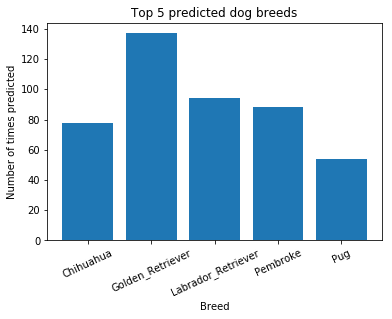

In [129]:
import matplotlib.pyplot as plt
%matplotlib inline

#Plot bar graph of top 5 dog breeds

breed = ['Golden_Retriever', 'Labrador_Retriever', 'Pembroke', 'Chihuahua', 'Pug']
number = [137, 94, 88, 78, 54]

plt.bar(breed, number);
plt.title('Top 5 predicted dog breeds');
plt.xlabel('Breed');
plt.ylabel('Number of times predicted');
plt.xticks(rotation=25);

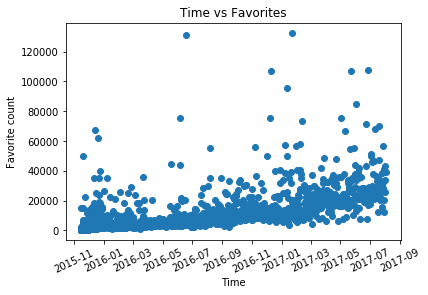

In [130]:
#Plot time vs favorite_counts
plt.plot_date(final_merged_df.timestamp, final_merged_df.favorite_counts);
plt.xticks(rotation=25);
plt.title('Time vs Favorites');
plt.xlabel('Time');
plt.ylabel('Favorite count');

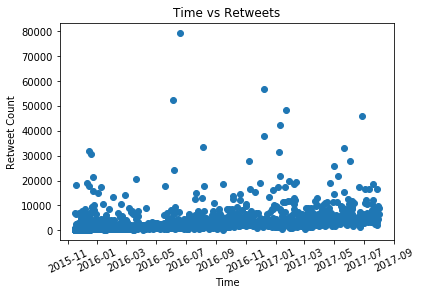

In [131]:
#Plot time vs retweet counts
plt.plot_date(final_merged_df.timestamp, final_merged_df.retweet_counts);
plt.xticks(rotation=25);
plt.title('Time vs Retweets');
plt.xlabel('Time');
plt.ylabel('Retweet Count');

In [132]:
final_merged_df.stage.value_counts()

pupper            201
doggo             63 
puppo             22 
doggo, pupper     8  
floofer           7  
doggo, puppo      1  
doggo, floofer    1  
Name: stage, dtype: int64

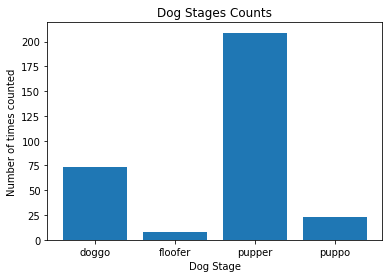

In [133]:
#Plot dog stage to counts
stage = ['pupper', 'doggo', 'puppo', 'floofer']
number = [209, 73, 23, 8]

plt.bar(stage, number);
plt.title('Dog Stages Counts');
plt.xlabel('Dog Stage');
plt.ylabel('Number of times counted');